# Matplotlib Pyplot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import plotly
plotly.tools.set_credentials_file(username='nikhil.marri91', api_key='3UX9zwHcchbl34tqFccI')
plotly.tools.set_config_file(world_readable=True,
                             sharing='public')

##### Read CSV files and Merging Data

In [2]:
deaths=pd.read_csv("Data/death.csv",usecols=['Year','Cause Name','State','Deaths'])
deaths=deaths.rename(columns={'Cause Name':'Cause'})
regions=pd.read_csv('Data/regions.csv')[['State','State Code','Region','Division']]
census=pd.read_csv('Data/census.csv')
fips=pd.read_csv('Data/codes.csv')
fips.head()

,FIPS,Name
0,9,Connecticut
1,23,Maine
2,25,Massachusetts
3,33,New Hampshire
4,44,Rhode Island


In [3]:
#Creating Dictionaries to map with Deaths Datafframe
pop=pd.Series(census.Pop.values,index=census.State).to_dict()
state_code=pd.Series(regions['State Code'].values,index=regions.State).to_dict()
region=pd.Series(regions.Region.values,index=regions.State).to_dict()
division=pd.Series(regions.Division.values,index=regions.State).to_dict()
#Mapping with State Codes,Region and Division
deaths['Code']=deaths.State.map(state_code)
deaths['Region']=deaths.State.map(region)
deaths['Division']=deaths.State.map(division)
#Mapping with Census to add Population by State(from US Census 2015)
deaths['Pop']=deaths.State.map(pop)
deaths.head()

,Year,Cause,State,Deaths,Code,Region,Division,Pop
0,1999,Unintentional Injuries,Alabama,2313.0,AL,South,East South Central,4850858
1,1999,Unintentional Injuries,Alaska,294.0,AK,West,Pacific,737979
2,1999,Unintentional Injuries,Arizona,2214.0,AZ,West,Mountain,6802262
3,1999,Unintentional Injuries,Arkansas,1287.0,AR,South,West South Central,2975626
4,1999,Unintentional Injuries,California,9198.0,CA,West,Pacific,39032444


##### Suicide Deaths by State in 2015 and 2014

In [4]:
state_deaths=deaths[deaths['State']!='United States']
suicide_deaths=state_deaths[(state_deaths['Cause']=='Suicide')].copy()
suicide_deaths.head()

,Year,Cause,State,Deaths,Code,Region,Division,Pop
9729,1999,Suicide,Alabama,555.0,AL,South,East South Central,4850858
9730,1999,Suicide,Alaska,96.0,AK,West,Pacific,737979
9731,1999,Suicide,Arizona,766.0,AZ,West,Mountain,6802262
9732,1999,Suicide,Arkansas,336.0,AR,South,West South Central,2975626
9733,1999,Suicide,California,3077.0,CA,West,Pacific,39032444


##### Bar Plot of Suicides by State Using Matplotlib

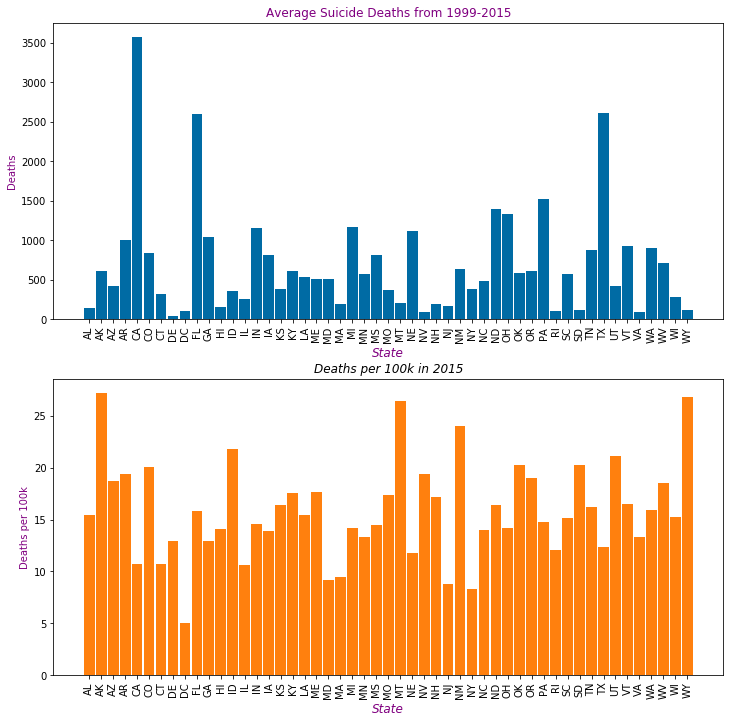

In [5]:
%matplotlib inline
suicides_by_state=round(suicide_deaths.groupby('Code').Deaths.mean()).reset_index()
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)
bar_positions=range(1,52)
fig=plt.figure(figsize=(12,12))

#Average Suicides by State from 1999-2015
ax1=fig.add_subplot(211)
bar_heights=suicides_by_state.Deaths.values
ax1.bar(bar_positions,bar_heights,align='center',width=0.9,color=cb_dark_blue)
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(suicide_deaths.Code,rotation='vertical')
ax1.set_ylabel('Deaths',color='purple')
ax1.set_xlabel('State',fontsize=12,fontstyle='oblique',color='purple')
ax1.set_title('Average Suicide Deaths from 1999-2015',color='purple')

#Deaths per 100k by State in Year 2015
df2015=suicide_deaths[suicide_deaths.Year==2015].copy()
df2015['Per_100k']=df2015.Deaths*100000/df2015.Pop
ax2=fig.add_subplot(212)
bar_heights2=df2015.Per_100k.values
ax2.bar(bar_positions,bar_heights2,align='center',width=0.9,color=cb_orange)
ax2.set_xticks(bar_positions)
ax2.set_xticklabels(df2015.Code,rotation='vertical')
ax2.set_xlabel('State',color='purple',fontsize=12,fontstyle='oblique')
ax2.set_ylabel('Deaths per 100k',color='purple')
ax2.set_title('Deaths per 100k in 2015',fontsize=12,fontstyle='oblique')
plt.show()


##### Plots of Suicide Deaths by Region

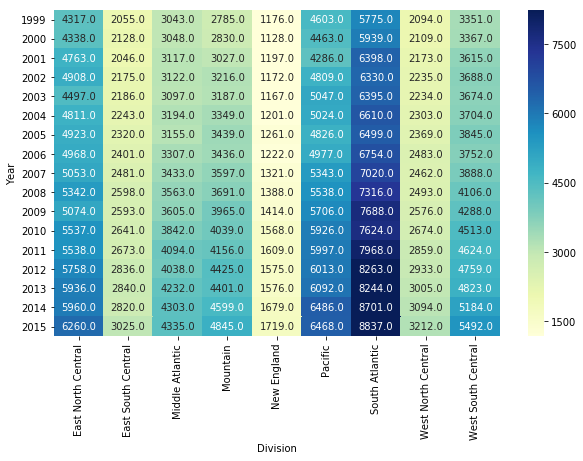

In [6]:
fig=plt.figure(figsize=(10,6))
suicide_division=suicide_deaths.pivot_table(index='Year',columns='Division',values='Deaths',aggfunc=np.sum)
sns.heatmap(suicide_division, annot=True,fmt=".1f",robust=True, cmap="YlGnBu")

In [7]:
deaths=deaths[(deaths.State !='United States')&(deaths.Cause!='All Causes')]
causes=deaths.sort_values('Deaths',ascending=False).Cause.tolist()
top_causes=[]
for cause in causes:
    if (cause not in top_causes) and (len(top_causes)<5):
        top_causes.append(cause)
top_causes

['Diseases of Heart', 'Cancer', 'Stroke', "Alzheimer's disease", 'CLRD']

In [8]:
import plotly.plotly as py
import plotly.graph_objs as go
data=[]
for i,cause in enumerate(top_causes):
    top=deaths[deaths.Cause==cause]
    top=top.groupby('Year').Deaths.sum().reset_index()
    trace=go.Scatter(x=top.Year,y=top.Deaths,mode='lines',name=cause,hoverinfo='y')
    data.append(trace)
layout=dict(title='Top 5 causes of death from 1999-2015',xaxis=dict(title='Year'),yaxis=dict(title='Deaths'))
fig=dict(data=data,layout=layout)
py.iplot(fig,filename='line-modes')